# Excel Automation

# Getting Started with xlwings

## Using Excel as Data Viewer

In [1]:
# First, let's import the packages that we'll use in this chapter
import datetime as dt
import xlwings as xw
import pandas as pd
import numpy as np

In [2]:
# Let's create a DataFrame based on pseudorandom numbers and
# with enough rows that only the head and tail are shown
df = pd.DataFrame(data=np.random.randn(100, 5),
                  columns=[f"Trial {i}" for i in range(1, 6)])
df

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,1.666973,-1.292595,-1.318922,0.235960,-0.311871
1,-1.071332,-0.192529,0.674638,0.171009,1.241887
2,0.814107,-1.162732,1.017951,0.525710,-3.201199
3,0.123432,0.795834,-0.753242,1.870031,-0.519202
4,0.029636,2.282485,1.082383,0.767480,0.176300
...,...,...,...,...,...
95,-0.686244,-0.062198,0.484740,0.489156,0.023322
96,0.261092,0.113748,0.128934,-0.273294,-0.774922
97,-0.682548,-0.345505,-0.399919,1.100817,-0.767575
98,0.297468,1.522666,-0.827018,-0.960302,-0.336064


In [3]:
# View the DataFrame in Excel
xw.view(df)

## The Excel Object Model

In [47]:
# Create a new empty workbook and print its name. This is the
# book we will use to run most of the code samples in this chapter.

book = xw.Book()
book.name

'Libro1'

In [48]:
# Accessing the sheets collection
book.sheets

Sheets([<Sheet [Libro1]Hoja1>])

In [49]:
# Get a sheet object by index or name. You will need to adjust
# "Sheet1" if your sheet is called differently.
sheet1 = book.sheets[0]
# sheet1 = book.sheets["Sheet1"]
sheet1 = book.sheets["Hoja1"]


In [15]:
sheet1.range("A1")

<Range [Libro1]Hoja1!$A$1>

In [50]:
# Most common tasks: write values...
sheet1.range("A1").value = [[1, 2],
                            [3, 4]]
sheet1.range("A4").value = "Hello!"

In [17]:
# ...and read values
sheet1.range("A1:B2").value

[[1.0, 2.0], [3.0, 4.0]]

In [18]:
sheet1.range("A4").value

'Hello!'

In [19]:
# Indexing
sheet1.range("A1:B2")[0, 0]

<Range [Libro1]Hoja1!$A$1>

In [20]:
# Slicing
sheet1.range("A1:B2")[:, 1]

<Range [Libro1]Hoja1!$B$1:$B$2>

In [21]:
# Single cell: A1 notation
sheet1["A1"]

<Range [Libro1]Hoja1!$A$1>

In [22]:
# Multiple cells: A1 notation
sheet1["A1:B2"]

<Range [Libro1]Hoja1!$A$1:$B$2>

In [23]:
# Single cell: indexing
sheet1[0, 0]

<Range [Libro1]Hoja1!$A$1>

In [24]:
# Multiple cells: slicing
sheet1[:2, :2]

<Range [Libro1]Hoja1!$A$1:$B$2>

In [25]:
# D10 via sheet indexing
sheet1[9, 3]

<Range [Libro1]Hoja1!$D$10>

In [26]:
# D10 via range object
sheet1.range((10, 4))

<Range [Libro1]Hoja1!$D$10>

In [27]:
# D10:F11 via sheet slicing
sheet1[9:11, 3:6]

<Range [Libro1]Hoja1!$D$10:$F$11>

In [28]:
# D10:F11 via range object
sheet1.range((10, 4), (11, 6))

<Range [Libro1]Hoja1!$D$10:$F$11>

In [29]:
sheet1["A1"].sheet.book.app

<Excel App 4876>

In [30]:
# Get one app object from the open workbook
# and create an additional invisible app instance
visible_app = sheet1.book.app
invisible_app = xw.App(visible=False)

In [31]:
# List the book names that are open in each instance
# by using a list comprehension
[book.name for book in visible_app.books]

['Libro1']

In [32]:
[book.name for book in invisible_app.books]

['Libro2']

In [33]:
# An app key represents the process ID (PID)
xw.apps.keys()

[22384, 4876]

In [34]:
# It can also be accessed via the pid attribute
xw.apps.active.pid

22384

In [35]:
# Work with the book in the invisible Excel instance
invisible_book = invisible_app.books[0]
invisible_book.sheets[0]["A1"].value = "Created by an invisible app."

In [36]:
# Save the Excel workbook in the xl directory
invisible_book.save("xl/invisible.xlsx")

In [37]:
# Quit the invisible Excel instance
invisible_app.quit()

## Running VBA Code

In [40]:
vba_book = xw.Book("xl/vba.xlsm")

In [41]:
# Instantiate a macro object with the VBA function
mysum = vba_book.macro("Module1.MySum")
# Call a VBA function
mysum(5, 4)

9.0

In [42]:
# It works the same with a VBA Sub procedure
show_msgbox = vba_book.macro("Module1.ShowMsgBox")
show_msgbox("Hello xlwings!")

In [43]:
# Close the book again (make sure to close the MessageBox first)
vba_book.close()

# Converters, Options and Collections

## Working with DataFrames

In [46]:
data = [["Mark", 55, "Italy", 4.5, "Europe"],
        ["John", 33, "USA", 6.7, "America"]]
df = pd.DataFrame(data=data,
                  columns=["name", "age", "country",
                           "score", "continent"],
                  index=[1001, 1000])
df.index.name = "user_id"
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America


In [51]:
sheet1["A6"].value = df

In [52]:
sheet1["B10"].options(header=False, index=False).value = df

In [53]:
df2 = sheet1["A6"].expand().options(pd.DataFrame).value
df2

,name,age,country,score,continent
user_id,,,,,
1001.0,Mark,55.0,Italy,4.5,Europe
1000.0,John,33.0,USA,6.7,America


In [54]:
# If you want the index to be an integer index,
# you can change its data type
df2.index = df2.index.astype(int)
df2

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,6.7,America


In [55]:
# By setting index=False, it will put all the values from Excel into
# the data part of the DataFrame and will use the default index
sheet1["A6"].expand().options(pd.DataFrame, index=False).value

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,6.7,America


## Converters and Options

In [56]:
# Horizontal range (one-dimensional)
sheet1["A1:B1"].value

[1.0, 2.0]

In [57]:
# Vertical range (one-dimensional)
sheet1["A1:A2"].value

[1.0, 3.0]

In [58]:
# Horizontal range (two-dimensional)
sheet1["A1:B1"].options(ndim=2).value

[[1.0, 2.0]]

In [59]:
# Vertical range (two-dimensional)
sheet1["A1:A2"].options(ndim=2).value

[[1.0], [3.0]]

In [60]:
# Using the NumPy array converter behaves the same:
# vertical range leads to a one-dimensional array
sheet1["A1:A2"].options(np.array).value

array([1., 3.])

In [61]:
# Preserving the column orientation
sheet1["A1:A2"].options(np.array, ndim=2).value

array([[1.],
       [3.]])

In [62]:
# If you need to write out a list vertically,
# the "transpose" option comes in handy
sheet1["D1"].options(transpose=True).value = [100, 200]

In [63]:
# Write out some sample data
sheet1["A13"].value = [dt.datetime(2020, 1, 1), None, 1.0]

In [64]:
# Read it back using the default options
sheet1["A13:C13"].value

[datetime.datetime(2020, 1, 1, 0, 0), None, 1.0]

In [65]:
# Read it back using non-default options
sheet1["A13:C13"].options(empty="NA",
                          dates=dt.date,
                          numbers=int).value

[datetime.date(2020, 1, 1), 'NA', 1]

## Charts, Pictures and Defined Names

In [66]:
sheet1["A15"].value = [[None, "North", "South"],
                       ["Last Year", 2, 5],
                       ["This Year", 3, 6]]

In [75]:
chart = sheet1.charts.add(top=sheet1["A19"].top,
                          left=sheet1["A19"].left)
chart.chart_type = "column_clustered"
chart.set_source_data(sheet1["A15"].expand())

In [68]:
# Read in the chart data as DataFrame
df = sheet1["A15"].expand().options(pd.DataFrame).value
df

,North,South
Last Year,2.0,5.0
This Year,3.0,6.0


In [69]:
# Enable Matplotlib by using the notebook magic command
# and switch to the "seaborn" style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

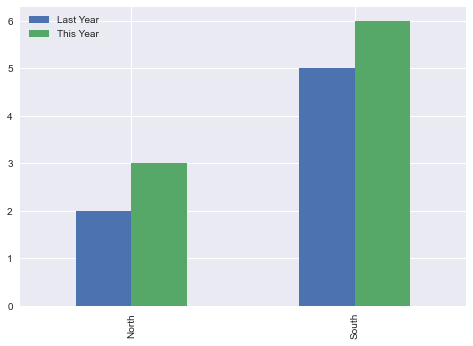

In [70]:
# The pandas plot method returns an "axis" object from
# where you can get the figure. "T" transposes the
# DataFrame to bring the plot into the desired orientation
ax = df.T.plot.bar()
fig = ax.get_figure()

In [71]:
# Send the plot to Excel
plot = sheet1.pictures.add(fig, name="SalesPlot",
                           top=sheet1["H19"].top,
                           left=sheet1["H19"].left)
# Let's scale the plot to 70%
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [72]:
ax = (df + 1).T.plot.bar()
plot = plot.update(ax.get_figure())

In [73]:
# The book scope is the default scope
sheet1["A1:B2"].name = "matrix1"

In [76]:
# For the sheet scope, prepend the sheet name with
# an exclamation point
sheet1["B10:E11"].name = "Hoja1!matrix2"

In [78]:
# Now you can access the range by name
sheet1["matrix1"]

<Range [Libro1]Hoja1!$A$1:$B$2>

In [79]:
# If you access the names collection via the "sheet1" object,
# it contains only names with that sheet's scope
sheet1.names

[<Name 'Hoja1!matrix2': =Hoja1!$B$10:$E$11>]

In [80]:
# If you access the names collection via the "book" object,
# it contains all names, including book and sheet scope
book.names

[<Name 'matrix1': =Hoja1!$A$1:$B$2>, <Name 'Hoja1!matrix2': =Hoja1!$B$10:$E$11>]

In [81]:
# Names have various methods and attributes.
# You can, for example, get the respective range object.
book.names["matrix1"].refers_to_range

<Range [Libro1]Hoja1!$A$1:$B$2>

In [82]:
# If you want to assign a name to a constant
# or a formula, use the "add" method.
# You may need to replace the decimal point with a comma
# if your are using an international version of Excel.
book.names.add("EURUSD", "=1.1151")

<Name 'EURUSD': =1.1151>

# Advanced Topics

## Performance

In [83]:
# Add a new sheet and write 150 values
# to it to have something to work with
sheet2 = book.sheets.add()
sheet2["A1"].value = np.arange(150).reshape(30, 5)

In [84]:
%%time
# This makes 150 cross-application calls
for cell in sheet2["A1:E30"]:
    cell.value += 1

CPU times: total: 203 ms
Wall time: 390 ms


In [85]:
%%time
# This makes just two cross-application calls
values = sheet2["A1:E30"].options(np.array).value
sheet2["A1:E30"].value = values + 1

CPU times: total: 46.9 ms
Wall time: 42.5 ms


In [87]:
# With raw values, you must provide the full
# target range, sheet["A35"] doesn't work anymore
sheet1["A35:B36"].options("raw").value = [[1, 2], [3, 4]]